<a href="https://colab.research.google.com/github/thuonguyenphan01-del/Sigle-cell-RNA-seq/blob/main/X%E1%BB%AD_l%C3%BD_d%E1%BB%AF_li%E1%BB%87u_c%C6%A1_b%E1%BA%A3n_v%E1%BB%9Bi_file_GSM5226574_C51ctr_raw_counts_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install scanpy

In [4]:
!pip install scvi-tools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.9/628.9 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.9/827.9 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.6/831.6 kB 64.2 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19876 sha256=dce5d0aef346b6689a537654076d88d5dc70813d74fb5c5549ab5a2fae6ef67e
  Stor

In [6]:
import scanpy as sc
import scvi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Thư viện scanpy hiểu đơn giản là thư viện cung cấp các công preprocessing,filter, normalization, visualization và các thuật toán machine learning. Các thuật toán giảm chiều dữ liệu PCA, t-SNE,UMAP.. phổ biến trong các mô hình học không giám sát, thuật toán machine learning:Louvain, Leiden(Sơ bộ hiểu là thuật clustering với ưu thế hơn k-n cluster ở điểm không cần phải biết trước k), k-nearest cluster (đã học). Andata hiểu đơn giản một advanced của pandas để phù hợp với xử lý dữ liệu single cell
1. Tiền xử lý dữ liệu – sc.pp (preprocessing)
- sc.pp.filter_cells() – lọc tế bào theo số gen được phát hiện.
- sc.pp.filter_genes() – lọc gen theo số tế bào biểu hiện.
- sc.pp.normalize_total() – chuẩn hóa tổng số đọc.
- sc.pp.log1p() – log-transform dữ liệu.
- sc.pp.scale() – chuẩn hóa dữ liệu về mean = 0, variance = 1.
- sc.pp.pca() – phân tích thành phần chính (PCA).
2. Phân tích – sc.tl (tools)
- sc.tl.umap() – tính toán tọa độ UMAP.
- sc.tl.tsne() – tính toán tọa độ t-SNE.
- sc.tl.leiden() – phân cụm bằng thuật toán Leiden.
- sc.tl.louvain() – phân cụm bằng thuật toán Louvain.
- sc.tl.rank_genes_groups() – tìm gen đặc trưng cho từng cụm.
- sc.tl.dendrogram() – xây dựng cây phân cấp.
- sc.tl.paga() – phân tích quỹ đạo (trajectory inference).
3. Trực quan hóa – sc.pl (plotting)
- sc.pl.umap() – vẽ biểu đồ UMAP.
- sc.pl.tsne() – vẽ biểu đồ t-SNE.
- sc.pl.pca() – vẽ biểu đồ PCA.
- sc.pl.violin() – biểu đồ violin cho gen.
- sc.pl.dotplot() – biểu đồ dot plot.
- sc.pl.heatmap() – heatmap biểu hiện gen.
4. Quản lý dữ liệu – sc.read và AnnData
- sc.read_10x_mtx() – đọc dữ liệu từ 10x Genomics.
- sc.read_h5ad() – đọc dữ liệu từ file .h5ad.
- sc.read_csv() – đọc dữ liệu từ CSV.
- adata.obs – metadata của tế bào.
- adata.var – metadata của gen.
- adata.X – ma trận biểu hiện gen.
Thư viện SCVI-tools dựa trên pytorch (deep learning 'tìm hiểu thêm'):
- SCVI / LinearSCVI → RNA-seq đơn bào
- SCANVI → phân loại tế bào bán giám sát
- TOTALVI → RNA + protein
- PEAKVI → ATAC-seq
- MULTIVI → RNA + ATAC
- DestVI → dữ liệu không gian


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
!ls /content/drive/MyDrive/Single\ cell


GSM5226574_C51ctr_raw_counts.csv


In [9]:
adata=sc.read_csv("/content/drive/MyDrive/Single cell/GSM5226574_C51ctr_raw_counts.csv").T

Tại sao lại đảo chiểu dữ liệu???Nguyên nhân là vì SOLO (và hầu hết các mô hình trong scvi-tools) giả định dữ liệu có dạng chuẩn:
- Hàng (rows) = cells
- Cột (columns) = genes



In [10]:
adata.shape

(6099, 34546)

In [11]:
adata.var

""
AL627309.1
AL627309.5
AL627309.4
AL669831.2
LINC01409
...
VN1R2
AL031676.1
SMIM34A
AL050402.1


In [12]:
adata.obs

""
TAGGTACCATGGCCAC-1_1
ATTCACTGTAACAGGC-1_1
TAACTTCCAACCACGC-1_1
TTGGGTACACGACAAG-1_1
AGGCCACAGAGTCACG-1_1
...
CGCCATTGTTTGCCGG-1_1
CACTGGGGTCTACGTA-1_1
CATACTTGTAGAGGAA-1_1
TTTGGTTTCCACGGAC-1_1


In [13]:
sc.pp.filter_genes(adata, min_cells=10)

In [14]:
adata.obs.index.nunique()

6099

- n_top_genes=2000: chọn ra 2000 gen biến thiên cao nhất (highly variable genes – HVGs)
- subset=True: giữ lại trong adata chỉ các gen biến thiên cao, loại bỏ gen ít biến thiên.
- flavor='seurat_v3': dùng phương pháp chọn HVGs theo cách của Seurat v3 (một công cụ phổ biến trong single-cell).



In [15]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='seurat_v3')

In [16]:
adata.var['highly_variable'].head(10)

,highly_variable
TTLL10,True
TNFRSF18,True
CFAP74,True
TTC34,True
AJAP1,True
TNFRSF9,True
ERRFI1,True
PGD,True
C1orf158,True
KAZN,True


In [17]:
scvi.model.SCVI.setup_anndata(adata)
vae= scvi.model.SCVI(adata)
vae.train()

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


In [18]:
solo=scvi.external.SOLO.from_scvi_model(vae)
solo.train()


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.268. Signaling Trainer to stop.


Model tự kich shoatj early stop để tránh overfitting
- Epoch 278/400
→ Mô hình đang ở epoch thứ 278 trên tổng số 400 epoch tối đa.
- train_loss_step = 0.268
→ Loss (hàm mất mát) tính ngay tại một batch (một bước huấn luyện).
→ Cho biết mô hình đang học như thế nào ở thời điểm hiện tại.
- train_loss_epoch = 0.292
→ Loss trung bình trên toàn bộ epoch (tất cả batch).
→ Đây là thước đo ổn định hơn so với train_loss_step.
- validation_loss
→ Loss trên tập validation (dữ liệu không dùng để train).
→ Dùng để đánh giá khả năng mô hình tổng quát hóa.
→ Nếu validation_loss giảm → mô hình học tốt hơn.
- Best score: 0.275
→ Giá trị validation_loss tốt nhất đạt được trong quá trình huấn luyện.
→ Đây là checkpoint mà Trainer sẽ lưu lại để dùng cho suy luận.
- Monitored metric validation_loss did not improve in the last 30 records
→ Trong 30 lần đánh giá gần nhất, validation_loss không giảm thêm.
→ Trainer kích hoạt early stopping để tránh overfitting và tiết kiệm thời gian.
- v_num = 1
→ Version number của run (Lightning tự gán).
→ Nếu bạn chạy nhiều lần, sẽ thấy v_num = 2, 3… để phân biệt.



In [19]:
import torch

In [20]:
df=solo.predict(return_logits=True)

/usr/local/lib/python3.12/dist-packages/torch/utils/_contextlib.py:120: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


Trả về logit scores (giá trị trước khi qua sigmoid/softmax):
- doublet và singlet có thể >1 hoặc <0.
- Không bị giới hạn, nên dif có thể lớn hơn 1 hoặc nhỏ hơn -1.
- Ý nghĩa: logit đo “độ tự tin” của mô hình trên thang đo rộng hơn.
Mặc định (solo.predict())
- Trả về xác suất (probability) cho mỗi cell:
- doublet ∈ [0,1]
- singlet ∈ [0,1]
- Hai giá trị này thường cộng lại ≈ 1 (vì là phân phối xác suất).
- Dễ hiểu, trực quan: bạn có thể nói “cell này có 90% khả năng là doublet”.
- Nhưng bị giới hạn trong [0,1], nên độ chênh lệch (dif) chỉ nằm trong [-1,1]

Mặc định: bạn nhận xác suất → dễ đọc, nhưng dif chỉ trong [-1,1].


return logit: bạn nhận logit → khó trực quan hơn, nhưng phân biệt rõ ràng hơn giữa doublet và singlet, và có thể lọc theo ngưỡng >1.


In [21]:
df.head(10)

,doublet,singlet
TAGGTACCATGGCCAC-1_1,1.278278,-1.841458
ATTCACTGTAACAGGC-1_1,0.581844,-1.168392
TAACTTCCAACCACGC-1_1,-1.071026,0.188014
TTGGGTACACGACAAG-1_1,0.450213,-0.556229
AGGCCACAGAGTCACG-1_1,0.619038,-1.054315
CACTGAAGTCGAAGCA-1_1,0.591227,-1.154380
ACTGATGTCTGCACCT-1_1,1.811486,-1.846153
TTACCGCCACTCAGAT-1_1,0.353616,-0.477448
TTGGTTTTCCTAGCTC-1_1,-0.480500,0.091393
TGGGAAGTCAGTGATC-1_1,0.465589,-0.578894


In [22]:
df['Prediction']=solo.predict(soft=False)

/usr/local/lib/python3.12/dist-packages/torch/utils/_contextlib.py:120: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


In [23]:
df.head(10)

,doublet,singlet,Prediction
TAGGTACCATGGCCAC-1_1,1.278278,-1.841458,doublet
ATTCACTGTAACAGGC-1_1,0.581844,-1.168392,doublet
TAACTTCCAACCACGC-1_1,-1.071026,0.188014,singlet
TTGGGTACACGACAAG-1_1,0.450213,-0.556229,doublet
AGGCCACAGAGTCACG-1_1,0.619038,-1.054315,doublet
CACTGAAGTCGAAGCA-1_1,0.591227,-1.154380,doublet
ACTGATGTCTGCACCT-1_1,1.811486,-1.846153,doublet
TTACCGCCACTCAGAT-1_1,0.353616,-0.477448,doublet
TTGGTTTTCCTAGCTC-1_1,-0.480500,0.091393,singlet
TGGGAAGTCAGTGATC-1_1,0.465589,-0.578894,doublet


In [24]:
df['Prediction'].value_counts()

,count
Prediction,
singlet,4671
doublet,1428


In [25]:
df['dif']=df['doublet']-df['singlet']

In [26]:
df1= df.query('Prediction == "doublet"')

In [27]:
df1.head(10)

,doublet,singlet,Prediction,dif
TAGGTACCATGGCCAC-1_1,1.278278,-1.841458,doublet,3.119736
ATTCACTGTAACAGGC-1_1,0.581844,-1.168392,doublet,1.750236
TTGGGTACACGACAAG-1_1,0.450213,-0.556229,doublet,1.006443
AGGCCACAGAGTCACG-1_1,0.619038,-1.054315,doublet,1.673353
CACTGAAGTCGAAGCA-1_1,0.591227,-1.154380,doublet,1.745607
ACTGATGTCTGCACCT-1_1,1.811486,-1.846153,doublet,3.657638
TTACCGCCACTCAGAT-1_1,0.353616,-0.477448,doublet,0.831064
TGGGAAGTCAGTGATC-1_1,0.465589,-0.578894,doublet,1.044483
CCACGAGTCTCTTAAC-1_1,0.716135,-1.089760,doublet,1.805895
ACTTCCGCACAACGCC-1_1,1.948014,-2.281865,doublet,4.229879


<Axes: xlabel='dif', ylabel='Count'>

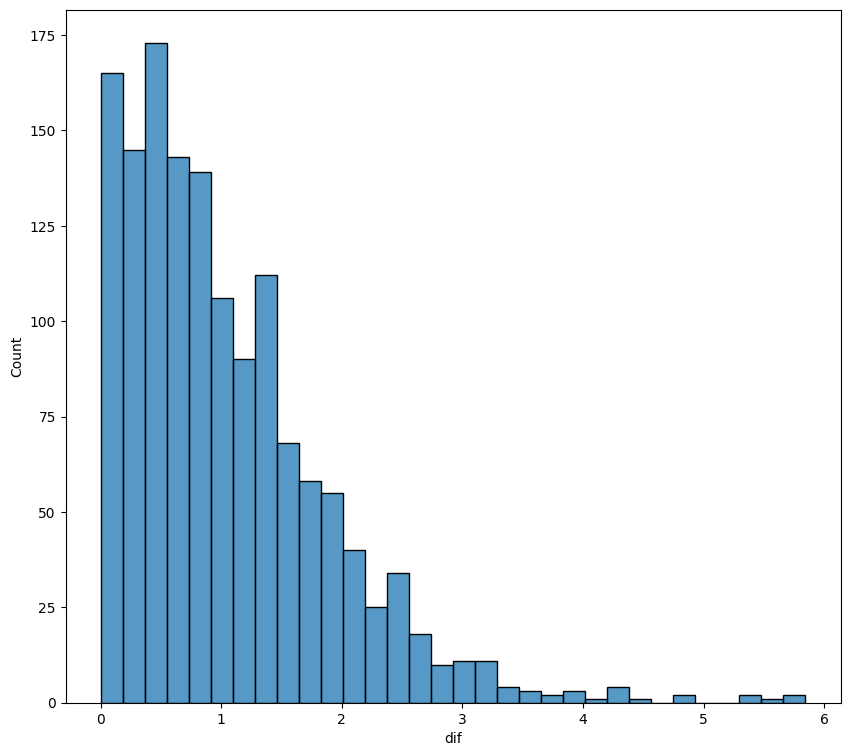

In [28]:
plt.figure(figsize= (10,9))

sns.histplot(df1, x='dif')

In [29]:
dou = df.query('Prediction == "doublet" & dif >1')

In [30]:
dou.head(10)

,doublet,singlet,Prediction,dif
TAGGTACCATGGCCAC-1_1,1.278278,-1.841458,doublet,3.119736
ATTCACTGTAACAGGC-1_1,0.581844,-1.168392,doublet,1.750236
TTGGGTACACGACAAG-1_1,0.450213,-0.556229,doublet,1.006443
AGGCCACAGAGTCACG-1_1,0.619038,-1.054315,doublet,1.673353
CACTGAAGTCGAAGCA-1_1,0.591227,-1.154380,doublet,1.745607
ACTGATGTCTGCACCT-1_1,1.811486,-1.846153,doublet,3.657638
TGGGAAGTCAGTGATC-1_1,0.465589,-0.578894,doublet,1.044483
CCACGAGTCTCTTAAC-1_1,0.716135,-1.089760,doublet,1.805895
ACTTCCGCACAACGCC-1_1,1.948014,-2.281865,doublet,4.229879
GGGAAGTAGCGACCCT-1_1,1.223698,-1.790470,doublet,3.014169


In [31]:
adata1=sc.read_csv("/content/drive/MyDrive/Single cell/GSM5226574_C51ctr_raw_counts.csv").T

In [32]:
adata1.obs['doublet'] = adata.obs.index.isin(dou.index)

In [33]:
adata1.obs

,doublet
TAGGTACCATGGCCAC-1_1,True
ATTCACTGTAACAGGC-1_1,True
TAACTTCCAACCACGC-1_1,False
TTGGGTACACGACAAG-1_1,True
AGGCCACAGAGTCACG-1_1,True
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


In [34]:
adata1= adata1[adata1.obs.doublet==False]

In [35]:
adata1

View of AnnData object with n_obs × n_vars = 5490 × 34546
    obs: 'doublet'

In [36]:
adata1.var

""
AL627309.1
AL627309.5
AL627309.4
AL669831.2
LINC01409
...
VN1R2
AL031676.1
SMIM34A
AL050402.1


In [37]:
adata1.var['mt']=[gene.startswith('MT-') for gene in adata1.var.index]

/tmp/ipython-input-2205638335.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata1.var['mt']=[gene.startswith('MT-') for gene in adata1.var.index]


In [38]:
adata1.var.head(10)

,mt
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
FAM87B,False
LINC01128,False
LINC00115,False
FAM41C,False
AL645608.6,False


In [39]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [40]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [41]:
ribo_genes = pd.DataFrame(ribo_genes)

In [42]:
ribo_genes[0].unique()

array(['FAU', 'MRPL13', 'RPL10', 'RPL10A', 'RPL10L', 'RPL11', 'RPL12',
       'RPL13', 'RPL13A', 'RPL14', 'RPL15', 'RPL17', 'RPL18', 'RPL18A',
       'RPL19', 'RPL21', 'RPL22', 'RPL22L1', 'RPL23', 'RPL23A', 'RPL24',
       'RPL26', 'RPL26L1', 'RPL27', 'RPL27A', 'RPL28', 'RPL29', 'RPL3',
       'RPL30', 'RPL31', 'RPL32', 'RPL34', 'RPL35', 'RPL35A', 'RPL36',
       'RPL36A', 'RPL36AL', 'RPL37', 'RPL37A', 'RPL38', 'RPL39', 'RPL3L',
       'RPL4', 'RPL41', 'RPL5', 'RPL6', 'RPL7', 'RPL7A', 'RPL8', 'RPL9',
       'RPLP0', 'RPLP1', 'RPLP2', 'RPS10', 'RPS11', 'RPS12', 'RPS13',
       'RPS15', 'RPS15A', 'RPS16', 'RPS17', 'RPS18', 'RPS19', 'RPS2',
       'RPS20', 'RPS21', 'RPS23', 'RPS24', 'RPS25', 'RPS26', 'RPS27',
       'RPS27A', 'RPS27L', 'RPS28', 'RPS29', 'RPS3', 'RPS3A', 'RPS4X',
       'RPS4Y1', 'RPS5', 'RPS6', 'RPS7', 'RPS8', 'RPS9', 'RPSA',
       'RSL24D1', 'RSL24D1P11', 'UBA52'], dtype=object)

In [43]:
adata1.var['ribo']= adata1.var_names.isin(ribo_genes[0].values)

In [44]:
adata1.var

,mt,ribo
AL627309.1,False,False
AL627309.5,False,False
AL627309.4,False,False
AL669831.2,False,False
LINC01409,False,False
...,...,...
VN1R2,False,False
AL031676.1,False,False
SMIM34A,False,False
AL050402.1,False,False


Mark gene ti thể và ribo

In [45]:
sc.pp.calculate_qc_metrics(adata1,qc_vars=['mt','ribo'],log1p=None,inplace=True, percent_top=None)

In [46]:
adata1.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL139275.2,False,False,0,0.000000,100.000000,0.0
AL356277.2,False,False,0,0.000000,100.000000,0.0
Z98880.1,False,False,0,0.000000,100.000000,0.0
TRBVA,False,False,0,0.000000,100.000000,0.0
AC021451.2,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,3920,2.722040,28.597450,14944.0
NEAT1,False,False,4001,4.745537,27.122040,26053.0
MBNL1,False,False,4005,2.623497,27.049180,14403.0
ZBTB20,False,False,4134,2.353734,24.699454,12922.0


- n_cells_by_counts: số cell mà gene đó được phát hiện.
- mean_counts: số lượng reads/UMI trung bình của gene đó trên toàn bộ cell.
- pct_dropout_by_counts: phần trăm cell mà gene đó không được phát hiện (dropout rate).
- total_counts: tổng số reads/UMI của gene đó trên toàn bộ datase


In [47]:
adata1.obs.sort_values('n_genes_by_counts')

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGGTTTCTGGCTGG-1_1,False,276,419.0,1.0,0.238663,1.0,0.238663
CGTGCTTCAAAGGGCT-1_1,False,277,432.0,41.0,9.490741,0.0,0.000000
TGACAGTTCTAAACGC-1_1,False,278,414.0,0.0,0.000000,0.0,0.000000
CTCTGGTCACGACGAA-1_1,False,285,407.0,0.0,0.000000,0.0,0.000000
GTAAGTCGTATCGCGC-1_1,False,289,430.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...
CGCATAACATGCCGGT-1_1,False,3745,8617.0,119.0,1.380991,25.0,0.290124
TTGGTTTTCCTAGCTC-1_1,False,3902,11472.0,463.0,4.035913,13.0,0.113319
ATCCACCAGAGGTATT-1_1,False,3913,8286.0,191.0,2.305093,34.0,0.410331
TTACCGCCACTCAGAT-1_1,False,4144,11369.0,39.0,0.343038,5.0,0.043979


- n_genes_by_counts: số gene được phát hiện trong cell.
- total_counts: tổng số reads/UMI trong cell.
- pct_counts_mt: phần trăm reads từ gene ty thể trong cell.
- pct_counts_ribo: phần trăm reads từ gene ribosomal trong cell.
n_genes>200=> không filter


In [48]:
#sc.pp.filter_genes(adata1,min_cells=3)

Lọc ra những genes có biểu hiện ở ít nhất 3 cells

In [49]:
adata1.var.sort_values('n_cells_by_counts',ascending=True)

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL139275.2,False,False,0,0.000000,100.000000,0.0
AL356277.2,False,False,0,0.000000,100.000000,0.0
Z98880.1,False,False,0,0.000000,100.000000,0.0
TRBVA,False,False,0,0.000000,100.000000,0.0
AC021451.2,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,3920,2.722040,28.597450,14944.0
NEAT1,False,False,4001,4.745537,27.122040,26053.0
MBNL1,False,False,4005,2.623497,27.049180,14403.0
ZBTB20,False,False,4134,2.353734,24.699454,12922.0


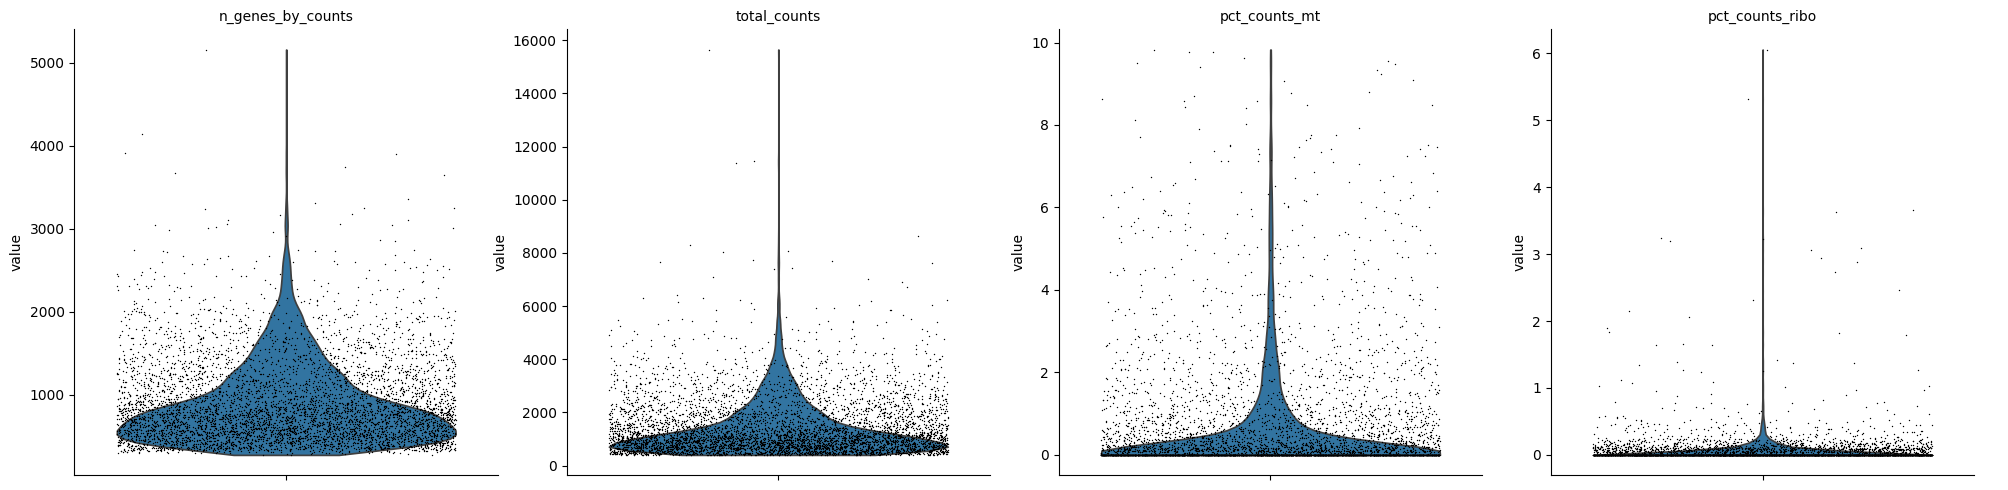

In [50]:
sc.pl.violin(adata1, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

<Axes: >

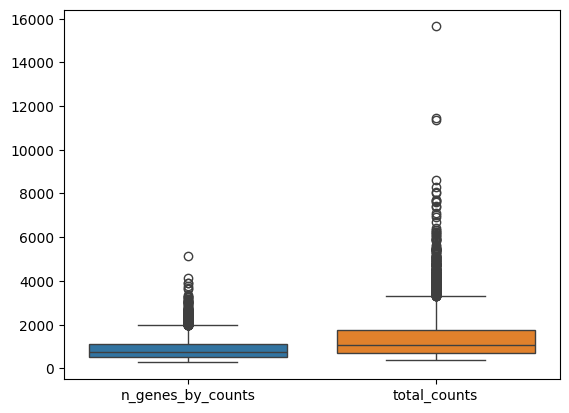

In [51]:
sns.boxplot(adata1.obs[['n_genes_by_counts','total_counts']])

Vì n_genes và total_counts corr với nhau nên chỉ cần lọc  1 cái

In [52]:
import numpy as np

In [53]:
min,max = np.quantile(adata1.obs.n_genes_by_counts, [.02,.98])

In [54]:
min,max

(np.float64(336.0), np.float64(2248.2000000000025))

In [55]:
adata1 = adata1[(adata1.obs.n_genes_by_counts < max) & (adata1.obs.pct_counts_mt < 20) & (adata1.obs.pct_counts_ribo < 2)]

In [56]:
adata1.obs.sort_values('pct_counts_ribo', ascending = False)

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
GTCAAGTCAAAGGTTA-1_1,False,830,1003.0,18.0,1.794616,19.0,1.894317
AAAGAACCACTATCGA-1_1,False,404,600.0,35.0,5.833333,11.0,1.833333
GGAGAACGTCTACGAT-1_1,False,779,882.0,23.0,2.607710,16.0,1.814059
AGCTTCCAGCCTCAAT-1_1,False,1108,1505.0,17.0,1.129568,27.0,1.794020
ACTCTCGTCCCATAGA-1_1,False,549,604.0,13.0,2.152318,10.0,1.655629
...,...,...,...,...,...,...,...
CAGCAGCCAGTCCGTG-1_1,False,794,1047.0,10.0,0.955110,0.0,0.000000
ACAGCCGAGTCGGGAT-1_1,False,713,1050.0,1.0,0.095238,0.0,0.000000
AACAAGACAAAGGAGA-1_1,False,794,1068.0,0.0,0.000000,0.0,0.000000
TGCACGGAGAAACTGT-1_1,False,1424,2345.0,4.0,0.170576,0.0,0.000000


In [57]:
sc.pp.filter_genes(adata1, min_cells = 10)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_simple.py:293: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [58]:
adata1.X

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
adata.write_h5ad("combined.h5ad")


In [60]:
adata1.layers['counts'] = adata1.X.copy()

Giữ raw counts giúp bạn:
- Đảm bảo tính chính xác cho QC và DE.
- Cho phép SCVI và các mô hình xác suất hoạt động đúng.
- Linh hoạt thử nhiều pipeline mà không cần quay lại dữ liệu gốc.

**Normalization/ Chuẩn hóa dữ liệu, đưa dữ liệu về 1 scale**(SCVI không cần bước này)

In [61]:
#adata1.X.sum(axis=1)

In [62]:
#sc.pp.normalize_total(adata1, target_sum=10000)# UMI (Unique Molecular Identifier)

Đây giống như 1 bước xử lý dữ liệu inbalance

In [63]:


#adata1.X.sum(axis = 1)

In [64]:
#sc.pp.log1p(adata1)

- Sau log1p: mỗi giá trị được biến đổi thành log(1 + count).


In [65]:
##adata1.X.sum(axis=1)

In [66]:
#adata1.raw=adata1#lưu dữ liệu đã được chuẩn hóa dic raw


Nhóm dữ liệu - Clustering
---



In [75]:
#sc.pp.highly_variable_genes(adata1, n_top_genes = 2000)

In [68]:
adata1.var


,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
AL627309.5,False,False,26,0.004736,99.526412,26.0,23
LINC01409,False,False,228,0.044991,95.846995,247.0,216
LINC01128,False,False,67,0.012750,98.779599,70.0,64
SAMD11,False,False,14,0.002914,99.744991,16.0,14
NOC2L,False,False,179,0.033515,96.739526,184.0,164
...,...,...,...,...,...,...,...
BX004987.1,False,False,18,0.003279,99.672131,18.0,16
MAFIP,False,False,27,0.004918,99.508197,27.0,26
AL354822.1,False,False,113,0.020947,97.941712,115.0,106
AL592183.1,False,False,823,0.176867,85.009107,971.0,785


In [70]:
#sc.pl.highly_variable_genes(adata1)

KeyError: 'hvg'

In [ ]:
#adata1= adata1[:,adata1.var.highly_variable]

In [ ]:
#adata1.var

In [ ]:
#adata1

cells đang lớn hơn genes!!! có thể dùng # sc.pp.highly_variable_genes(adata, n_top_genes=3000, subset = True, layer = 'counts',
flavor = "seurat_v3", batch_key="Sample") no batch_key if one sample

In [ ]:
#sc.pp.regress_out(adata1, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

 regression (hồi quy loại bỏ biến nhiễu)
Hàm này sẽ chạy hồi quy tuyến tính cho từng gene, loại bỏ ảnh hưởng của các biến đó khỏi dữ liệu biểu hiện.

In [ ]:
#sc.pp.scale(adata1, max_value=10)

- Mục đích: chuẩn hóa mỗi gene về mean = 0 và variance = 1.
- Đây là bước cần thiết trước khi chạy PCA hoặc các thuật toán clustering, vì nhiều gene có độ biến thiên rất khác nhau.
- max_value=10: giới hạn giá trị sau khi scale. Nếu một giá trị vượt quá ±10 sau chuẩn hóa, nó sẽ bị cắt (clipped).
- Điều này giúp tránh ảnh hưởng quá lớn từ outlier (gene cực kỳ cao/thấp).


In [ ]:
#sc.tl.pca(adata1, svd_solver='arpack')

In [ ]:
#sc.pl.pca_variance_ratio(adata1,n_pcs = 60,log=True)

Tương tự như elbow method trong k-n Cluster. Oử đây sẽ tìm điểm elbow

SCVI (scvi‑tools) chủ yếu được thiết kế để:
- Giải quyết batch effect khi có nhiều sample/điều kiện.
- Học latent space xác suất từ raw counts để phân tích đa batch hoặc dữ liệu phức tạp.
chỉ có 1 batch (C51ctr) thì không có batch effect để điều chỉnh → dùng SCVI là không cần thiết.


In [72]:
scvi.model.SCVI.setup_anndata(adata1, layer = "counts",
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])

- scvi.model.SCVI.setup_anndata(...) là bước chuẩn bị dữ liệu cho mô hình SCVI.
- SCVI không dùng PCA của Scanpy làm đầu vào. Thay vào đó, SCVI tự học latent space từ raw counts (hoặc layer bạn chỉ định).
- đã regress_out từ trước nê khi setup SCVI không cần đưa chúng vào continuous_covariate_keys nữa


In [73]:
model = scvi.model.SCVI(adata1)

In [74]:
model.train()

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


In [76]:
adata1.obsm['X_scVI'] = model.get_latent_representation()

obsm nơi lưu các ma trân
model.get_latent_representation()
- Đây là hàm trong SCVI (scvi‑tools) để lấy latent space mà mô hình đã học được.
- Latent space là ma trận tọa độ (embedding) của từng cell trong không gian tiềm ẩn, thường có kích thước (n_cells, n_latent_dim) (ví dụ 5520 × 10).
- Nó giống như PCA nhưng được học bằng mô hình xác suất, thường biểu diễn cấu trúc sinh học tốt hơn.


In [77]:
adata1.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)#lấy dữ liệu biểu hiện gene đã được SCVI chuẩn hóa và lưu nó vào một layer mới trong AnnData


In [78]:
sc.pp.neighbors(adata1, use_rep='X_scVI')

In [ ]:
#sc.pp.neighbors(adata1, n_pcs = 30)

xây dựng graph láng giềng (neighbors graph). Sử dụng 30 PCA thay vì toàn bộ gen sau bước này sẽ là bước t-Sna/Umap để xử lý dữ liệu phi tuyến tính


In [ ]:
#adata1.obsp['connectivities']

In [79]:
sc.tl.umap(adata1)

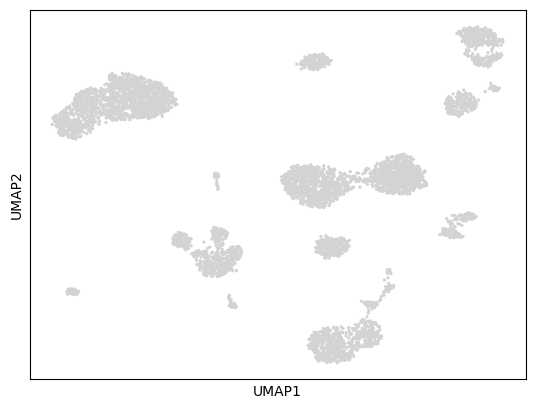

In [80]:
sc.pl.umap(adata1)

In [81]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 101.3 MB/s eta 0:00:00


In [97]:
for res in [0.1, 0.3, 0.5, 0.7]:
    sc.tl.leiden(adata1, resolution=res, key_added=(f'leiden_{res}'))


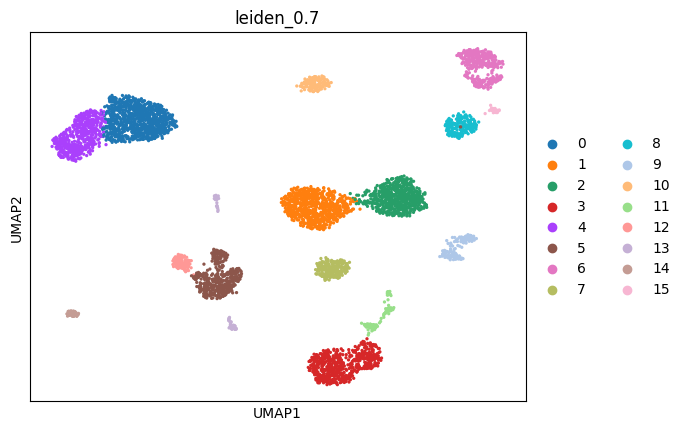

In [100]:
sc.pl.umap(adata1, color=['leiden_0.7'])

In [102]:
sc.tl.leiden(adata1, resolution = 0.5)

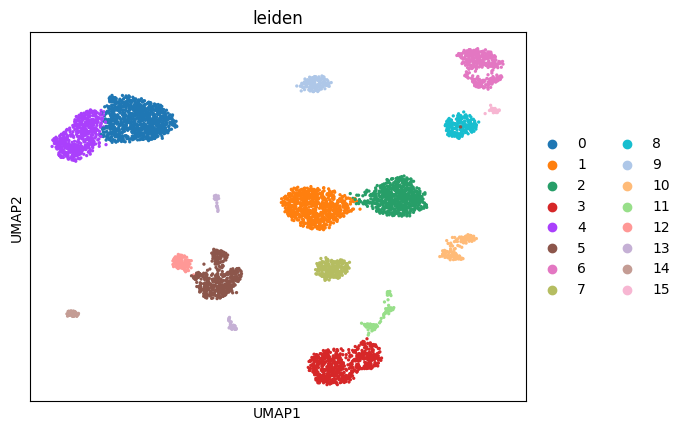

In [103]:
sc.pl.umap(adata1, color=['leiden'])

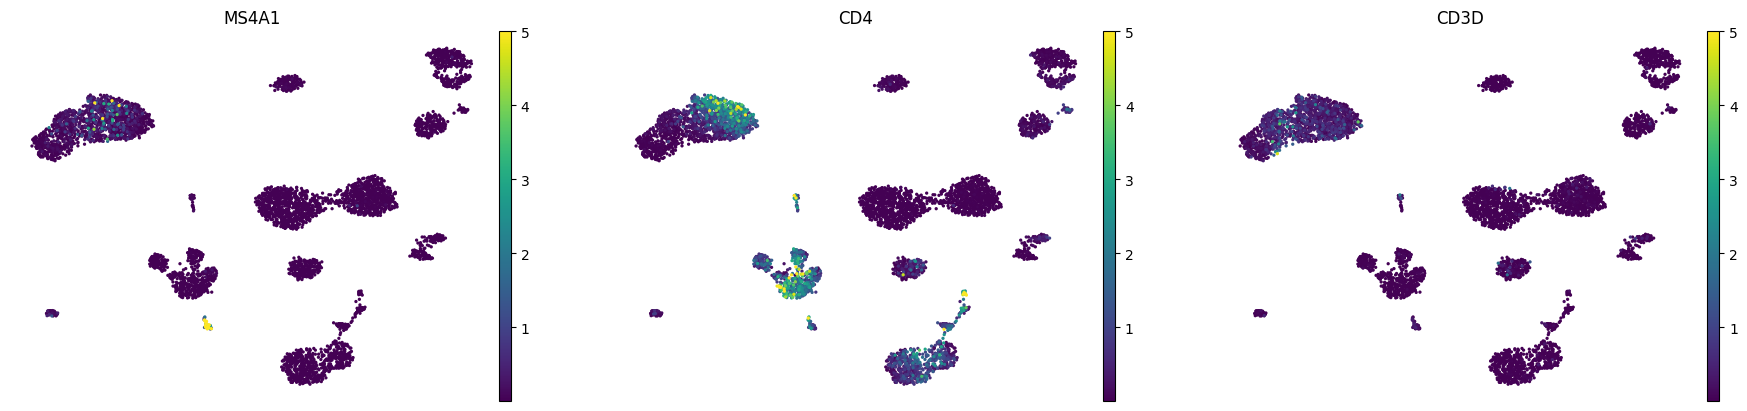

In [105]:
sc.pl.umap(adata1, color=["MS4A1", "CD4", "CD3D"], ncols=3,frameon = False, layer = 'scvi_normalized',vmax = 5)


In [93]:
cell_type={i:"" for i in range(1,16)}
cell_type


{1: '',
 2: '',
 3: '',
 4: '',
 5: '',
 6: '',
 7: '',
 8: '',
 9: '',
 10: '',
 11: '',
 12: '',
 13: '',
 14: '',
 15: ''}

In [108]:
adata1.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,leiden_0.1,leiden_0.3,leiden_0.5,leiden_0.7
ATACTTCCAAGGTCTT-1_1,False,2122,5252.0,1.0,0.019040,4.0,0.076161,0,0,2,3,2,2,2
GATAGCTCAGGCTTGC-1_1,False,2167,4879.0,0.0,0.000000,0.0,0.000000,0,0,2,3,2,2,2
CCACTTGCAACAGCTT-1_1,False,2213,4735.0,0.0,0.000000,0.0,0.000000,0,0,3,2,3,3,3
GACCCAGCACCCTATC-1_1,False,2150,4784.0,28.0,0.585284,4.0,0.083612,0,0,2,3,2,2,2
ATGCATGCAAACGTGG-1_1,False,2191,4747.0,0.0,0.000000,1.0,0.021066,0,0,2,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000,0,0,7,5,6,7,7
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000,0,0,1,1,1,1,1
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000,0,0,0,0,0,0,0
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827,0,0,6,6,5,6,6


In [109]:
adata1.obs['cluster']=adata1.obs['leiden_0.5']

Gắn nhãn cell_type vào list đã tạo

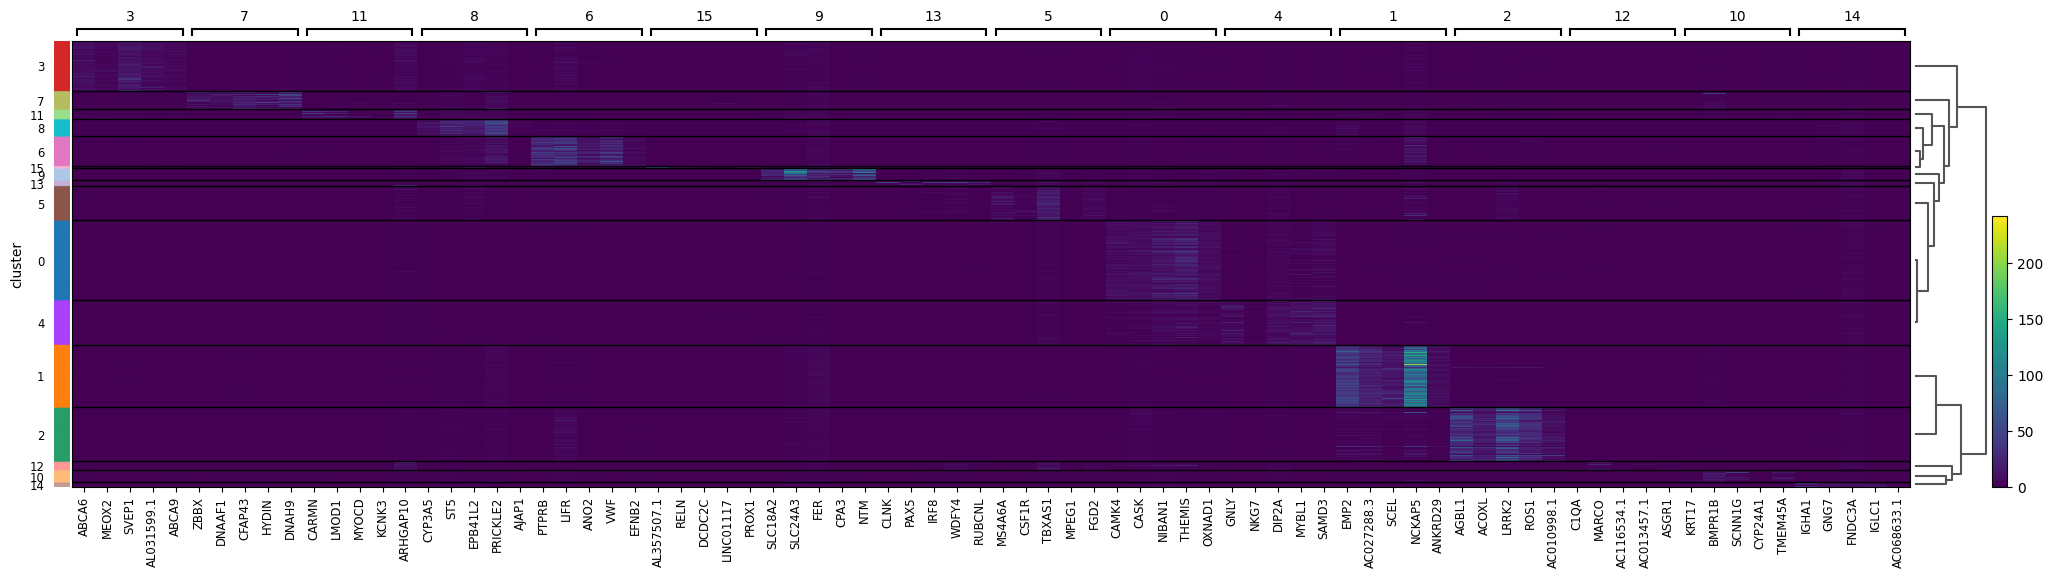

In [118]:
sc.pl.rank_genes_groups_heatmap(adata1,groupby='cluster',n_genes=5,layer = 'scvi_normalized',show_gene_labels=True)

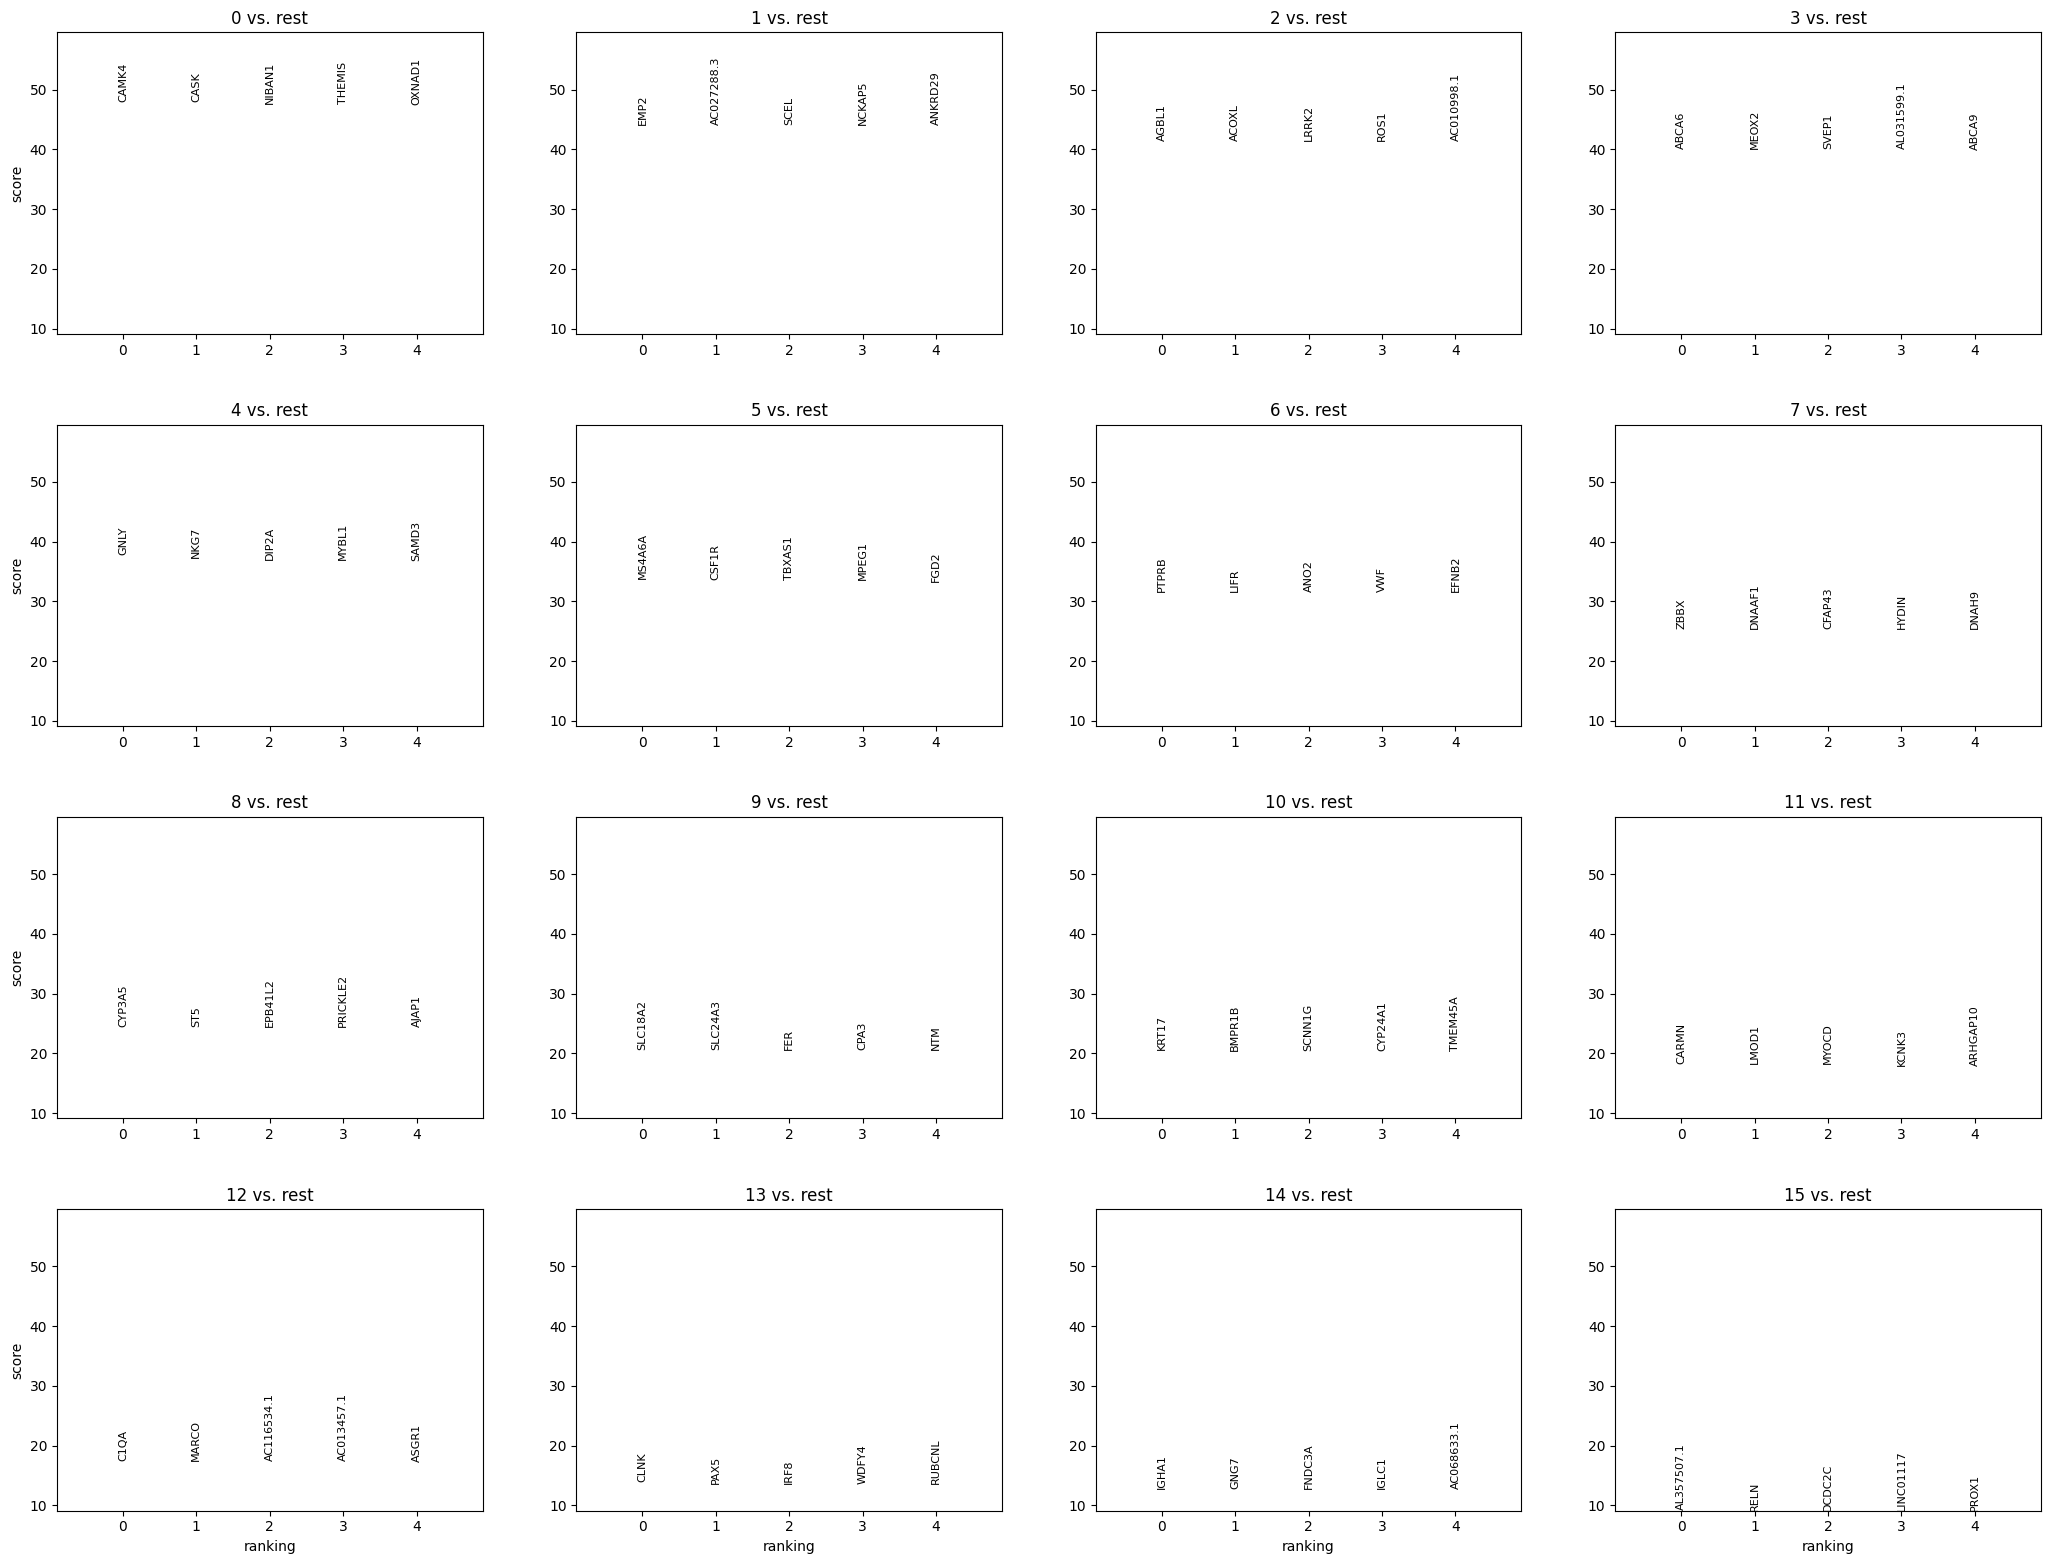

In [120]:
sc.pl.rank_genes_groups(
    adata1,
    groupby='cluster',
    method='wilcoxon',
    n_genes=5,
    layer='scvi_normalized'
)

